In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("/content/drive/My Drive/Data/Hyderabad.txt",sep="\s+",header=None)

In [0]:
data.head()

,0,1,2,3,4,5,6,7
0,"Year,","Month,","Day,",UTC,"Hour,","PM2.5,","PM10_mask,",Retrospective
1,2016,3,3,8,58.5,0.00,0,NaN
2,2016,3,3,9,63.7,0.00,0,NaN
3,2016,3,3,10,59.8,0.00,0,NaN
4,2016,3,3,11,60.6,0.00,0,NaN


In [0]:
df = data.drop(data.index[0])

In [0]:
df= df.dropna(axis=1)

In [0]:
df.head()

,0,1,2,3,4,5,6
1,2016,3,3,8,58.5,0.00,0
2,2016,3,3,9,63.7,0.00,0
3,2016,3,3,10,59.8,0.00,0
4,2016,3,3,11,60.6,0.00,0
5,2016,3,3,12,62.5,0.00,0


In [0]:
df.columns=["Year","Month","Day","UTC_Hour","PM","PM10_mask","Retrospective"]

In [0]:
df.head()

,Year,Month,Day,UTC_Hour,PM,PM10_mask,Retrospective
1,2016,3,3,8,58.5,0.00,0
2,2016,3,3,9,63.7,0.00,0
3,2016,3,3,10,59.8,0.00,0
4,2016,3,3,11,60.6,0.00,0
5,2016,3,3,12,62.5,0.00,0


In [0]:
df.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            30922, 30923, 30924, 30925, 30926, 30927, 30928, 30929, 30930,
            30931],
           dtype='int64', length=30931)

In [0]:
df.reset_index(drop=True)

,Year,Month,Day,UTC_Hour,PM,PM10_mask,Retrospective
0,2016,3,3,8,58.5,0.00,0
1,2016,3,3,9,63.7,0.00,0
2,2016,3,3,10,59.8,0.00,0
3,2016,3,3,11,60.6,0.00,0
4,2016,3,3,12,62.5,0.00,0
...,...,...,...,...,...,...,...
30926,2020,3,17,20,21.7,0.00,0
30927,2020,3,17,21,18.8,0.00,0
30928,2020,3,17,22,17.6,0.00,0
30929,2020,3,17,23,19.0,0.00,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30931 entries, 1 to 30931
Data columns (total 7 columns):
Year             30931 non-null object
Month            30931 non-null object
Day              30931 non-null object
UTC_Hour         30931 non-null object
PM               30931 non-null object
PM10_mask        30931 non-null object
Retrospective    30931 non-null object
dtypes: object(7)
memory usage: 1.9+ MB


In [0]:
convert_dict = {'Year': int, 
                'Month': str,
                'Day': int,
                'UTC_Hour': int,
                'PM': float,
                'PM10_mask': float,
                'Retrospective':int
               } 

df = df.astype(convert_dict) 
print(df.dtypes) 

Year               int64
Month             object
Day                int64
UTC_Hour           int64
PM               float64
PM10_mask        float64
Retrospective      int64
dtype: object


In [0]:
df_2020=df.query('Year=="2020"')
df_2020 = df_2020.reset_index(drop=True)


In [0]:
df_2020=df_2020.groupby(['Month','Day'],as_index=False)['PM'].mean()
df_2020.head(30)

,Month,Day,PM
0,1,1,44.758333
1,1,2,36.466667
2,1,3,41.045833
3,1,4,61.691667
4,1,5,68.141667
5,1,6,56.300000
6,1,7,57.241667
7,1,8,40.500000
8,1,9,50.170833
9,1,10,71.879167


In [0]:
df_2020['Month'].replace({'1':'January','2':'February','3':'March'},inplace=True)

In [0]:
df_2020.head()

,Month,Day,PM
0,January,1,44.758333
1,January,2,36.466667
2,January,3,41.045833
3,January,4,61.691667
4,January,5,68.141667


In [0]:
df_2020['Year'] = 2020
df_2020

,Month,Day,PM,Year
0,January,1,44.758333,2020
1,January,2,36.466667,2020
2,January,3,41.045833,2020
3,January,4,61.691667,2020
4,January,5,68.141667,2020
5,January,6,56.300000,2020
6,January,7,57.241667,2020
7,January,8,40.500000,2020
8,January,9,50.170833,2020
9,January,10,71.879167,2020


In [0]:
df_2020['Date']= df_2020['Day'].astype(str)+'-' + df_2020['Month'] +'-'+ df_2020['Year'].astype(str)
df_2020.head()

,Month,Day,PM,Year,Date
0,January,1,44.758333,2020,1-January-2020
1,January,2,36.466667,2020,2-January-2020
2,January,3,41.045833,2020,3-January-2020
3,January,4,61.691667,2020,4-January-2020
4,January,5,68.141667,2020,5-January-2020


In [0]:
datafinal = df_2020[['Date','PM']]
datafinal.head()

,Date,PM
0,1-January-2020,44.758333
1,2-January-2020,36.466667
2,3-January-2020,41.045833
3,4-January-2020,61.691667
4,5-January-2020,68.141667


In [0]:
datafinal.to_csv("/content/drive/My Drive/Data/datafinal.csv")

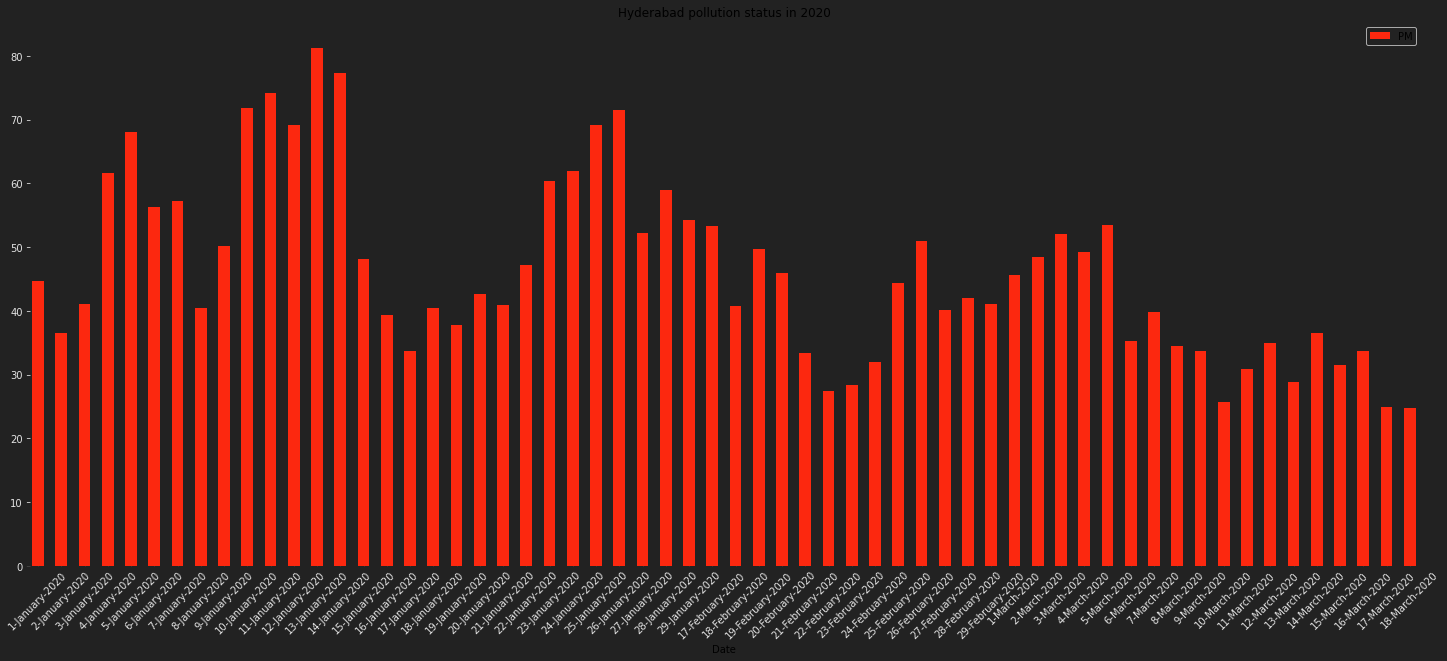

In [0]:
datafinal.plot(x='Date',y='PM',kind='bar',title="Hyderabad pollution status in 2020",rot=45,figsize=(25,10),grid=False)

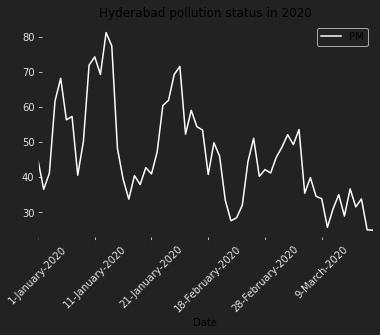

In [0]:
datafinal.plot(x='Date',y='PM',kind='line',title="Hyderabad pollution status in 2020",rot=45,grid=False,color='white')

In [0]:
plt.savefig('output.png')

<Figure size 432x288 with 0 Axes>